# EA Sports FC 24 Player Value Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for seaborn
sns.set(style="whitegrid")

%matplotlib inline

In [2]:
df1 = pd.read_csv('E:Downloads/Datasets/archive/male_players.csv', low_memory=False)
df1.head()

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,231747,/player/231747/kylian-mbappe/240002,24.0,2.0,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,...,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,239085,/player/239085/erling-haaland/240002,24.0,2.0,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,...,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,192985,/player/192985/kevin-de-bruyne/240002,24.0,2.0,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,...,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,158023,/player/158023/lionel-messi/240002,24.0,2.0,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,...,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
4,165153,/player/165153/karim-benzema/240002,24.0,2.0,2023-09-22,K. Benzema,Karim Benzema,"CF, ST",90,90,...,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3


In [3]:
df1['is_male'] = 1

In [4]:
df2 = pd.read_csv('E:Downloads/Datasets/archive/female_players.csv', low_memory=False)
df2.head()

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,227203,/player/227203/alexia-putellas-segura/240002,24.0,2.0,2023-09-22,Alexia Putellas,Alexia Putellas Segura,"CM, LW",91,91,...,83+3,83+3,83+3,82+3,80+3,76+3,76+3,76+3,80+3,23+3
1,241667,/player/241667/aitana-bonmati-conca/240002,24.0,2.0,2023-09-22,Aitana Bonmatí,Aitana Bonmatí Conca,CM,90,92,...,83+3,83+3,83+3,81+3,79+3,75+3,75+3,75+3,79+3,21+3
2,227102,/player/227102/caroline-graham-hansen/240002,24.0,2.0,2023-09-22,C. Hansen,Caroline Graham Hansen,RW,90,90,...,68+3,68+3,68+3,71+3,67+3,60+3,60+3,60+3,67+3,20+3
3,227125,/player/227125/sam-kerr/240002,24.0,2.0,2023-09-22,S. Kerr,Samantha May Kerr,ST,90,90,...,62+3,62+3,62+3,64+3,61+3,58+3,58+3,58+3,61+3,20+3
4,236479,/player/236479/maria-pilar-leon-cebrian/240002,24.0,2.0,2023-09-22,Mapi León,María Pilar León Cebrián,CB,89,90,...,86+3,86+3,86+3,85+3,86+3,88+2,88+2,88+2,86+3,20+3


In [5]:
df2['is_male'] = 0

In [6]:
df = pd.concat([df1, df2])

In [7]:
df.head()

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,is_male
0,231747,/player/231747/kylian-mbappe/240002,24.0,2.0,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,...,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3,1
1,239085,/player/239085/erling-haaland/240002,24.0,2.0,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,...,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3,1
2,192985,/player/192985/kevin-de-bruyne/240002,24.0,2.0,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,...,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3,1
3,158023,/player/158023/lionel-messi/240002,24.0,2.0,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,...,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3,1
4,165153,/player/165153/karim-benzema/240002,24.0,2.0,2023-09-22,K. Benzema,Karim Benzema,"CF, ST",90,90,...,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3,1


### Exploratory Data Analysis

In [8]:
# Filter the fifa_version
df = df[(df['fifa_version'] == 24.0)]

In [9]:
# Top players in each category
attributes_by_category = {
    'Attacking': ['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys'],
    'Skill': ['skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control'],
    'Movement': ['movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance'],
    'Power': ['power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots'],
    'Mentality': ['mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure'],
    'Defending': ['defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle'],
    'Goalkeeping': ['goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']
}

# Calculate score for each player in each category
for category, attributes in attributes_by_category.items():
    df[f'{category}_score'] = df[attributes].mean(axis=1).round(2)

top10_players = {}

# Find top 10 players in each category
for category in attributes_by_category.keys():
    top10_players[category] = df.nlargest(10, f'{category}_score')[['short_name', f'{category}_score']].reset_index(drop=True)

# Display the top 10 players in each category
for category, players_df in top10_players.items():
    print(f'Top 10 players in {category}:')
    print(players_df[['short_name', f'{category}_score']])
    print()

Top 10 players in Attacking:
        short_name  Attacking_score
0          H. Kane             88.0
1  Alexia Putellas             87.4
2       K. Benzema             86.6
3   R. Lewandowski             86.6
4     A. Griezmann             86.2
5        M. Katoto             85.6
6     A. Hegerberg             85.4
7          S. Kerr             85.0
8          A. Popp             85.0
9        A. Morgan             84.2

Top 10 players in Skill:
        short_name  Skill_score
0         L. Messi         93.0
1  Alexia Putellas         91.0
2     K. De Bruyne         89.4
3        Neymar Jr         89.0
4      Á. Di María         88.4
5        P. Dybala         87.8
6          Debinha         87.6
7     A. Griezmann         87.4
8           Parejo         87.2
9        C. Hansen         86.8

Top 10 players in Movement:
     short_name  Movement_score
0     K. Mbappé            92.4
1      Vini Jr.            90.8
2  D. Cascarino            90.6
3      M. Salah            90.2
4      M

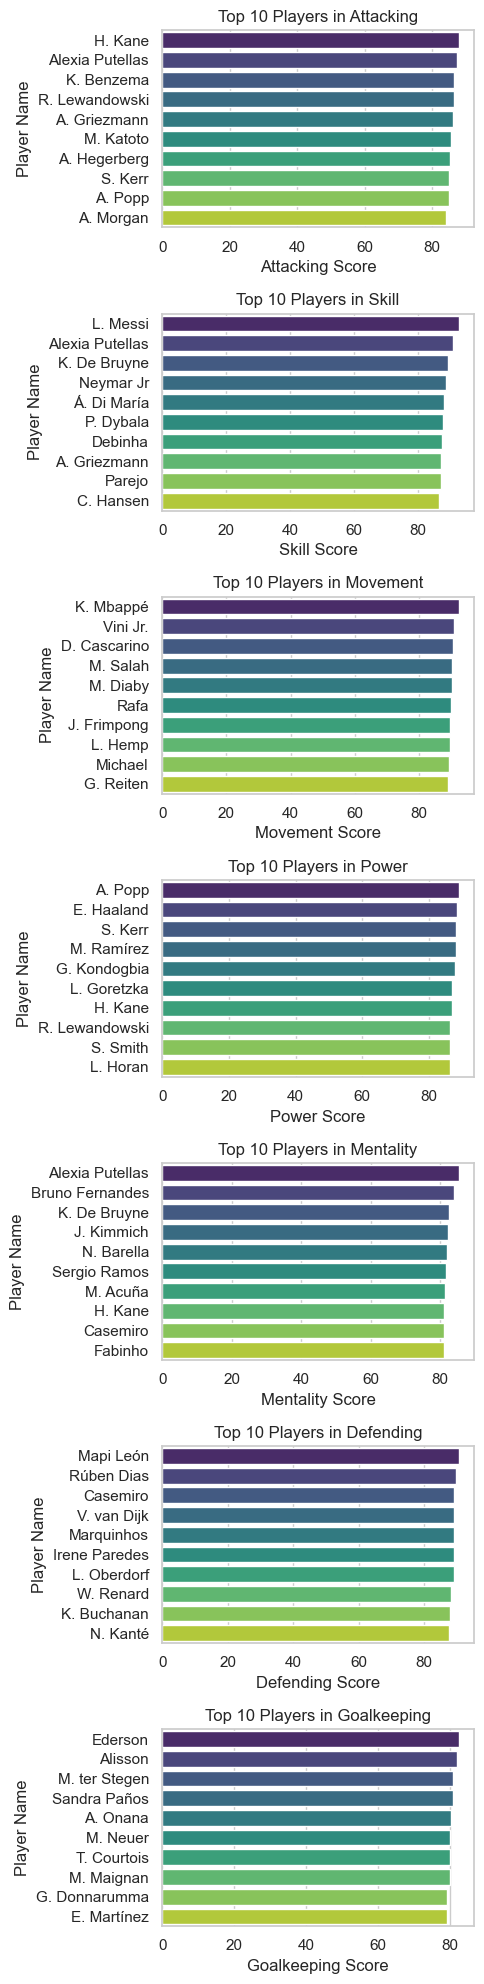

In [10]:
# Create subplots
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(5, 20))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate over each category
for i, (category, players_df) in enumerate(top10_players.items()):
    ax = axes[i]
    
    # Bar chart
    sns.barplot(x=f'{category}_score', y='short_name', data=players_df, ax=ax, palette="viridis")
    
    # Set labels and title
    ax.set_xlabel(f'{category} Score')
    ax.set_ylabel('Player Name')
    ax.set_title(f'Top 10 Players in {category}')

# Adjust layout
plt.tight_layout()
plt.show()

In [11]:
# Calculate the mean score for each player across all categories
df['overall_score'] = df[[f'{category}_score' for category in attributes_by_category.keys()]].mean(axis=1).round(2)

# Find the top 10 players based on the overall score
top10_overall_players = df.nlargest(15, 'overall_score')[['short_name', 'overall_score']].reset_index(drop=True)

# Display the top 10 players based on overall score
print("Top 10 Players Overall:")
print(top10_overall_players)

df = df.drop(columns=['overall_score', 'Attacking_score', 'Skill_score', 'Movement_score', 'Power_score', 'Mentality_score', 'Defending_score', 'Goalkeeping_score'])

Top 10 Players Overall:
         short_name  overall_score
0   Alexia Putellas          73.86
1         Mapi León          71.21
2        J. Kimmich          70.96
3          M. Acuña          70.87
4   Bruno Fernandes          70.70
5          F. Rolfö          70.63
6           C. Dunn          70.54
7       L. Goretzka          70.32
8        N. Barella          70.26
9       F. Valverde          70.23
10         A. Majri          70.23
11         D. Alaba          70.19
12   Patri Guijarro          70.14
13        L. Bronze          70.12
14        S. Tonali          70.06


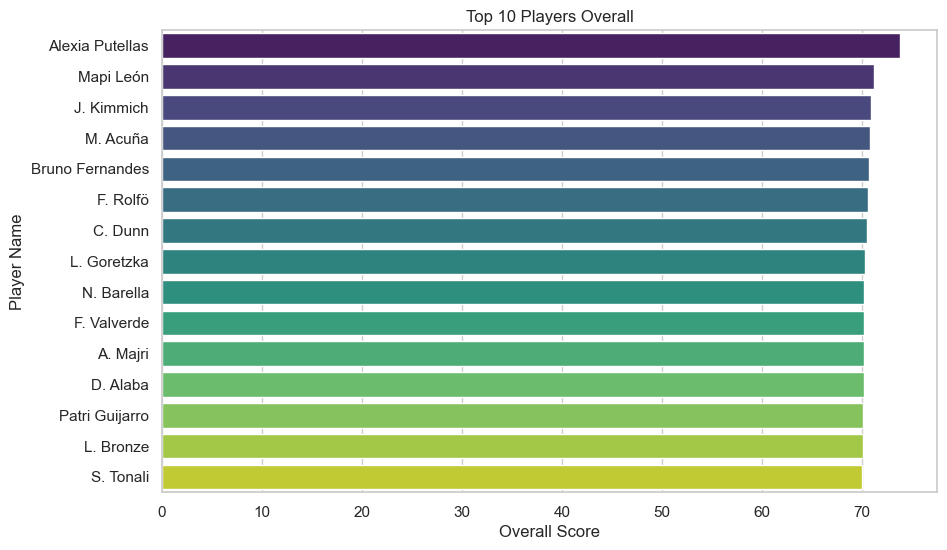

In [12]:
# Create a bar chart for overall scores of top 10 players
plt.figure(figsize=(10, 6))
sns.barplot(x='overall_score', y='short_name', data=top10_overall_players, palette="viridis")

# Set labels and title
plt.xlabel('Overall Score')
plt.ylabel('Player Name')
plt.title('Top 10 Players Overall')

# Show the plot
plt.show()

In [13]:
df.loc[:, df.nunique() > df.shape[0]/2]

,player_id,player_url,short_name,long_name
0,231747,/player/231747/kylian-mbappe/240002,K. Mbappé,Kylian Mbappé Lottin
1,239085,/player/239085/erling-haaland/240002,E. Haaland,Erling Braut Haaland
2,192985,/player/192985/kevin-de-bruyne/240002,K. De Bruyne,Kevin De Bruyne
3,158023,/player/158023/lionel-messi/240002,L. Messi,Lionel Andrés Messi Cuccittini
4,165153,/player/165153/karim-benzema/240002,K. Benzema,Karim Benzema
...,...,...,...,...
1834,276843,/player/276843/aleigh-gambone/240002,A. Gambone,Aleigh Gambone
1835,277258,/player/277258/claudia-castro-romero/240002,Claudia Castro,Claudia Castro Romero
1836,275890,/player/275890/luisa-sury/240002,L. Süry,Luisa Süry
1837,276617,/player/276617/joy-lysser/240002,J. Lysser,Joy Lysser


In [14]:
# Drop columns with too many unique values
df = df.drop(columns=['player_id', 'player_url', 'short_name', 'long_name'])

In [15]:
# Drop columns with single value and duplicate columns
df = df.drop(columns=['fifa_version', 'fifa_update', 'update_as_of', 'age', 'club_team_id', 'league_id', 'nationality_id'])

In [16]:
df.loc[:, df.isnull().sum() > df.shape[0]/2]

,club_loaned_from,nation_team_id,nation_position,nation_jersey_number,player_tags,player_traits,goalkeeping_speed
0,NaN,1335.0,LW,10.0,"#Speedster, #Dribbler, #Acrobat, #Clinical fin...","Quick Step +, Rapid, Flair, Trivela",NaN
1,NaN,1352.0,ST,9.0,"#Aerial threat, #Distance shooter, #Strength, ...","Acrobatic +, Power Header, Quick Step",NaN
2,NaN,1325.0,CAM,7.0,"#Dribbler, #Playmaker, #Distance shooter, #Cro...","Pinged Pass +, Dead Ball, Incisive Pass, Long ...",NaN
3,NaN,1369.0,RW,10.0,"#Dribbler, #Playmaker, #FK Specialist, #Acroba...","Technical +, Finesse Shot, Dead Ball, Pinged P...",NaN
4,NaN,NaN,NaN,NaN,"#Poacher, #Aerial threat, #Clinical finisher, ...","Finesse Shot +, Dead Ball, Pinged Pass, Tiki T...",NaN
...,...,...,...,...,...,...,...
1834,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1835,NaN,NaN,NaN,NaN,NaN,NaN,34.0
1836,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Drop columns with too many null values except goalkeeping_speed
df = df.drop(columns=['club_loaned_from', 'nation_team_id', 'nation_position', 'nation_jersey_number', 'player_tags', 'player_traits'])

In [18]:
df.head()

,player_positions,overall,potential,value_eur,wage_eur,dob,height_cm,weight_kg,club_name,league_name,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,is_male
0,"ST, LW",91,94,181500000.0,230000.0,1998-12-20,182,75,Paris Saint Germain,Ligue 1,...,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3,1
1,ST,91,94,185000000.0,340000.0,2000-07-21,195,94,Manchester City,Premier League,...,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3,1
2,"CM, CAM",91,91,103000000.0,350000.0,1991-06-28,181,75,Manchester City,Premier League,...,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3,1
3,"CF, CAM",90,90,41000000.0,23000.0,1987-06-24,169,67,Inter Miami,Major League Soccer,...,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3,1
4,"CF, ST",90,90,51000000.0,95000.0,1987-12-19,185,81,Al Ittihad,Pro League,...,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3,1


In [19]:
# List of player position columns to clean
columns_to_process = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram',
                       'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb',
                       'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']

# Extract the numeric part before '+'
for col in columns_to_process:
    df[col] = df[col].str.extract(r'(\d+)', expand=False)

    # Convert the column to numeric
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [20]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

player_positions
['ST, LW' 'ST' 'CM, CAM' 'CF, CAM' 'CF, ST']
718

overall
[91 90 89 88 87]
45

potential
[94 91 90 89 92]
47

value_eur
[1.815e+08 1.850e+08 1.030e+08 4.100e+07 5.100e+07]
267

wage_eur
[230000. 340000. 350000.  23000.  95000.]
131

dob
['1998-12-20' '2000-07-21' '1991-06-28' '1987-06-24' '1987-12-19']
6355

height_cm
[182 195 181 169 185]
57

weight_kg
[75 94 67 81 96]
61

club_name
['Paris Saint Germain' 'Manchester City' 'Inter Miami' 'Al Ittihad'
 'FC Barcelona']
741

league_name
['Ligue 1' 'Premier League' 'Major League Soccer' 'Pro League' 'La Liga']
52

league_level
[ 1. nan  2.  3.  4.]
4

club_position
['LW' 'ST' 'SUB' 'RF' 'RS']
29

club_jersey_number
[ 7.  9. 17. 10.  1.]
99

club_joined_date
['2018-07-01' '2022-07-01' '2015-08-30' '2023-07-16' '2023-07-01']
1894

club_contract_valid_until_year
[2024. 2027. 2025. 2026. 2028.]
10

nationality_name
['France' 'Norway' 'Belgium' 'Argentina' 'Poland']
160

preferred_foot
['Right' 'Left']
2

weak_foot
[4 3 5 2 1]


In [21]:
# Change 'dob' to 'age_in_days'

# Convert 'dob' to datetime
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')

# Specify the target date (22-09-2023)
target_date = pd.to_datetime('2023-09-22')

# Create a new column with the age (number of days until the target date)
df['age_in_days'] = (target_date - df['dob']).dt.days

# Drop the original 'dob' column
df = df.drop(columns=['dob'])

In [22]:
# Change 'club_joined_date' to 'days_in_club'

# Convert 'club_joined_date' to datetime
df['club_joined_date'] = pd.to_datetime(df['club_joined_date'], errors='coerce')

# Specify the target date (22-09-2023)
target_date = pd.to_datetime('2023-09-22')

# Create a new column with the number of days until the target date
df['days_in_club'] = (target_date - df['club_joined_date']).dt.days

df = df.drop(columns=['club_joined_date'])

In [23]:
df.isnull().sum()[df.isnull().sum() > 0]

value_eur                           213
wage_eur                            199
club_name                           199
league_name                         199
league_level                        199
club_position                       199
club_jersey_number                  199
club_contract_valid_until_year      199
release_clause_eur                 1411
pace                               2261
shooting                           2261
passing                            2261
dribbling                          2261
defending                          2261
physic                             2261
goalkeeping_speed                 17928
days_in_club                       1397
dtype: int64

In [24]:
# Drop rows with no value_eur
df = df.dropna(subset=['value_eur'])

In [25]:
# Replace null values in 'days_in_club' with the median value
median_days_in_club = df['days_in_club'].median()
df['days_in_club'].fillna(median_days_in_club, inplace=True)

In [26]:
# Replace null values in 'release_clause_eur' with the median value
median_release_clause_eur = df['release_clause_eur'].median()
df['release_clause_eur'].fillna(median_release_clause_eur, inplace=True)

In [27]:
df.isnull().sum()[df.isnull().sum() > 0]

pace                  2232
shooting              2232
passing               2232
dribbling             2232
defending             2232
physic                2232
goalkeeping_speed    17744
dtype: int64

In [28]:
# Fill null values with 0s
df = df.fillna(0)

In [29]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

In [30]:
# Convert real_face column to 1s and 0s
# Define mapping
mapping = {'Yes': 1, 'No': 0}

# Apply mapping to column
df['real_face'] = df['real_face'].map(mapping)

In [31]:
# Convert player_positions column to one-hot encoded columns
# Split the positions and create one-hot encoded columns
positions_dummies = df['player_positions'].str.get_dummies(', ')

df = pd.concat([df, positions_dummies], axis=1)

df = df.drop(columns=['player_positions'])

In [32]:
categorical_columns = df.select_dtypes(include='object').columns
categorical_columns

Index(['club_name', 'league_name', 'club_position', 'nationality_name',
       'preferred_foot', 'work_rate', 'body_type'],
      dtype='object')

### Feature Importance

In [33]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
import pandas as pd

le = LabelEncoder()

MI_scores = pd.DataFrame(columns=['Feature', 'MI Score'])

for column in categorical_columns:
    df['cat_col_encoded'] = le.fit_transform(df[column])

    X = df[['cat_col_encoded']]  # Feature matrix
    y = df['value_eur']  # Target variable

    mi = mutual_info_classif(X, y)
    mi_score = pd.DataFrame({'Feature': [column], 'MI Score': mi})

    MI_scores = pd.concat([MI_scores, mi_score], ignore_index=True)

    df = df.drop(columns=['cat_col_encoded'])

print(MI_scores)

            Feature  MI Score
0         club_name  0.017467
1       league_name  0.027770
2     club_position  0.019419
3  nationality_name  0.023285
4    preferred_foot  0.069757
5         work_rate  0.046246
6         body_type  0.028501


Mutual information scores are very low for ```club_name```, ```nationality_name```. Since there are 741 and 160 unique club and nationality names, its better to drop the columns to increase the efficiency of the model.

In [34]:
df = df.drop(columns=['club_name', 'nationality_name'])

In [35]:
df.shape

(19976, 105)

In [36]:
# Check MI scores for some numerical columns
columns = ['height_cm', 'weight_kg', 'league_level', 'club_jersey_number', 'club_contract_valid_until_year', 'weak_foot', 'skill_moves', 'international_reputation', 'real_face', 'st', 'cm', 'cb', 'gk', 'GK']

MI_scores = pd.DataFrame(columns=['Feature', 'MI Score'])

for column in columns:
    X = df[[column]]  # Feature matrix
    y = df['value_eur']  # Target variable

    mi = mutual_info_classif(X, y)
    mi_score = pd.DataFrame({'Feature': [column], 'MI Score': mi})
    
    MI_scores = pd.concat([MI_scores, mi_score], ignore_index=True)

print(MI_scores)

                           Feature  MI Score
0                        height_cm  0.040737
1                        weight_kg  0.027499
2                     league_level  0.166763
3               club_jersey_number  0.053986
4   club_contract_valid_until_year  0.053060
5                        weak_foot  0.036982
6                      skill_moves  0.122608
7         international_reputation  0.127367
8                        real_face  0.168189
9                               st  0.268863
10                              cm  0.319932
11                              cb  0.156446
12                              gk  0.210936
13                              GK  0.033894


In [37]:
df.head()

,overall,potential,value_eur,wage_eur,height_cm,weight_kg,league_name,league_level,club_position,club_jersey_number,...,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
0,91,94,181500000.0,230000.0,182,75,Ligue 1,1.0,LW,7.0,...,0,0,0,1,0,0,0,0,0,1
1,91,94,185000000.0,340000.0,195,94,Premier League,1.0,ST,9.0,...,0,0,0,0,0,0,0,0,0,1
2,91,91,103000000.0,350000.0,181,75,Premier League,1.0,SUB,17.0,...,0,0,0,0,0,0,0,0,0,0
3,90,90,41000000.0,23000.0,169,67,Major League Soccer,1.0,RF,10.0,...,0,0,0,0,0,0,0,0,0,0
4,90,90,51000000.0,95000.0,185,81,Pro League,1.0,RS,9.0,...,0,0,0,0,0,0,0,0,0,1


In [38]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

overall
[91 90 89 88 87]
45

potential
[94 91 90 89 92]
47

value_eur
[1.815e+08 1.850e+08 1.030e+08 4.100e+07 5.100e+07]
267

wage_eur
[230000. 340000. 350000.  23000.  95000.]
131

height_cm
[182 195 181 169 185]
57

weight_kg
[75 94 67 81 96]
61

league_name
['Ligue 1' 'Premier League' 'Major League Soccer' 'Pro League' 'La Liga']
52

league_level
[1. 2. 3. 4.]
4

club_position
['LW' 'ST' 'SUB' 'RF' 'RS']
29

club_jersey_number
[ 7.  9. 17. 10.  1.]
99

club_contract_valid_until_year
[2024. 2027. 2025. 2026. 2028.]
10

preferred_foot
['Right' 'Left']
2

weak_foot
[4 3 5 2 1]
5

skill_moves
[5 3 4 1 2]
5

international_reputation
[5 4 3 2 1]
5

work_rate
['High/Low' 'High/Medium' 'Low/Low' 'Medium/Medium' 'High/High']
9

body_type
['Unique' 'Normal (170-185)' 'Lean (170-185)' 'Normal (185+)'
 'Lean (185+)']
10

real_face
[1 0]
2

release_clause_eur
[3.494e+08 3.561e+08 1.906e+08 6.150e+07 8.160e+07]
1348

pace
[97. 89. 72. 80. 79.]
71

shooting
[90. 93. 88. 87. 91.]
75

passing
[80. 

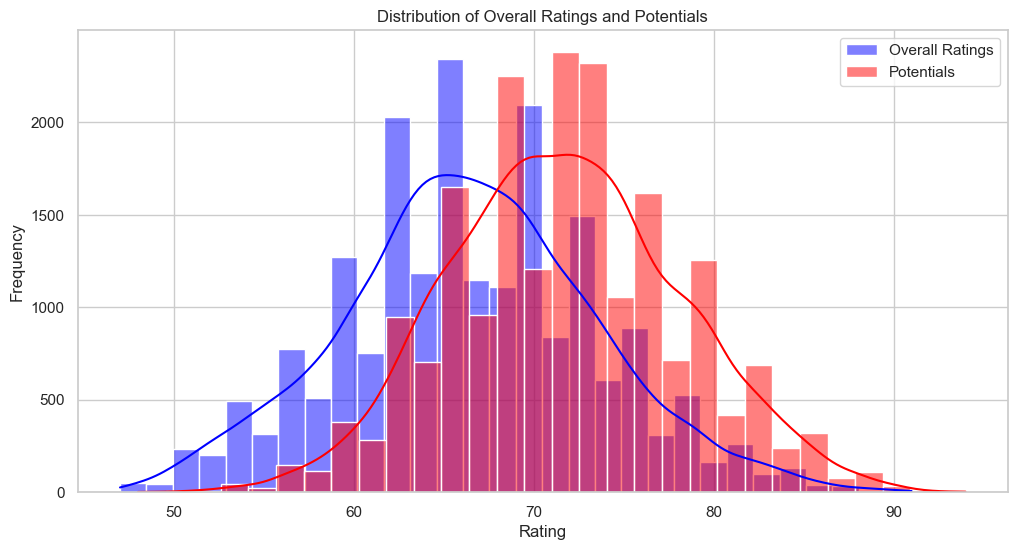

In [39]:
# Distribution of Overall Ratings and Potentials
plt.figure(figsize=(12, 6))
sns.histplot(df['overall'], bins=30, kde=True, color='blue', label='Overall Ratings')
sns.histplot(df['potential'], bins=30, kde=True, color='red', label='Potentials')
plt.title('Distribution of Overall Ratings and Potentials')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()

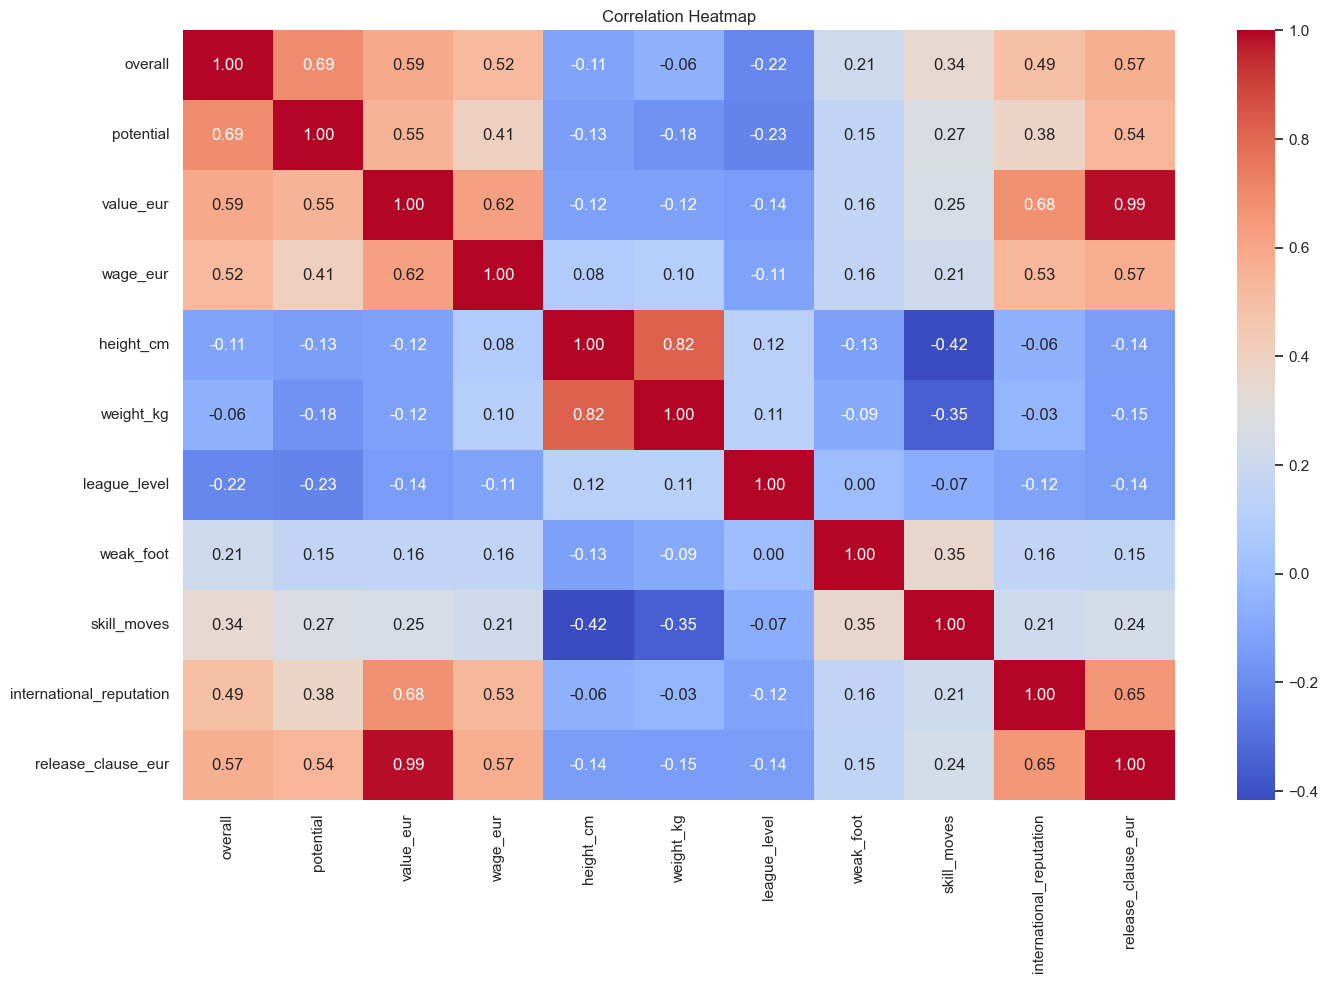

In [40]:
# Correlation Heatmap
# Choose a subset of columns for correlation analysis
subset_columns = ['overall', 'potential', 'value_eur', 'wage_eur', 'height_cm', 'weight_kg', 'league_level', 'weak_foot', 'skill_moves', 'international_reputation', 'release_clause_eur']

plt.figure(figsize=(16, 10))
sns.heatmap(df[subset_columns].corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

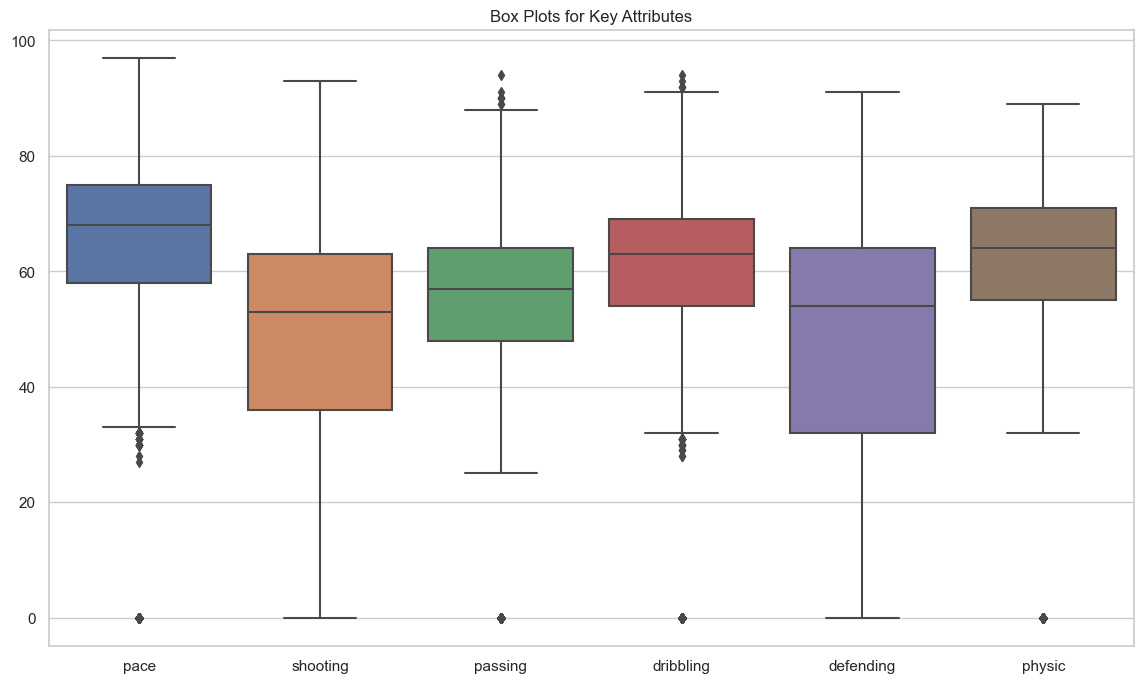

In [41]:
# Box Plots for Key Attributes
key_attributes = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
plt.figure(figsize=(14, 8))
sns.boxplot(data=df[key_attributes])
plt.title('Box Plots for Key Attributes')
plt.show()

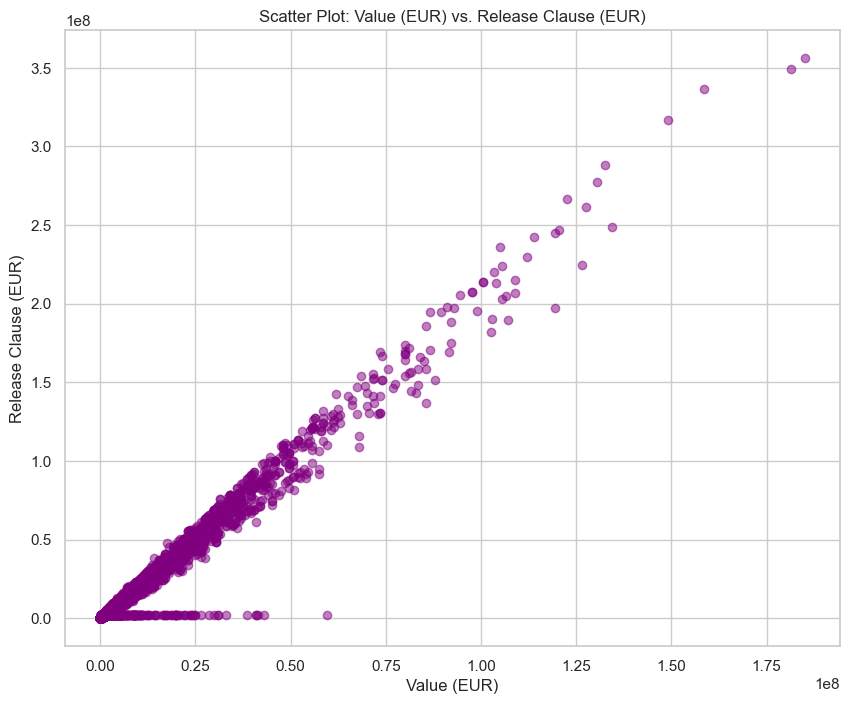

In [42]:
# Scatter plot for value_eur and release_clause_eur
plt.figure(figsize=(10, 8))

plt.scatter(df['value_eur'], df['release_clause_eur'], alpha=0.5, color='purple')
plt.title('Scatter Plot: Value (EUR) vs. Release Clause (EUR)')
plt.xlabel('Value (EUR)')
plt.ylabel('Release Clause (EUR)')

plt.show()

In [43]:
# Perform one-hot encoding on categorical columns
categorical_columns = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=categorical_columns)

In [44]:
df.shape

(19976, 202)

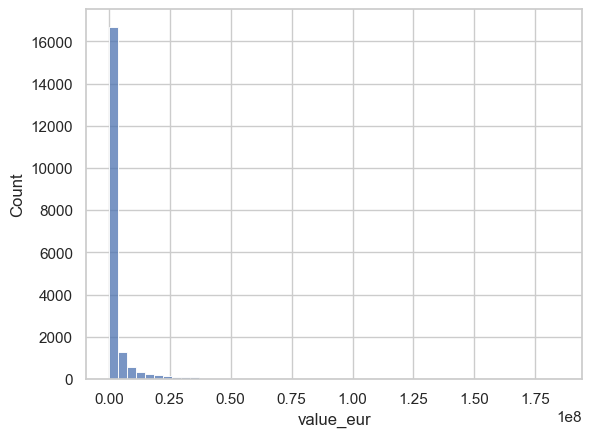

In [45]:
sns.histplot(df.value_eur, bins=50);

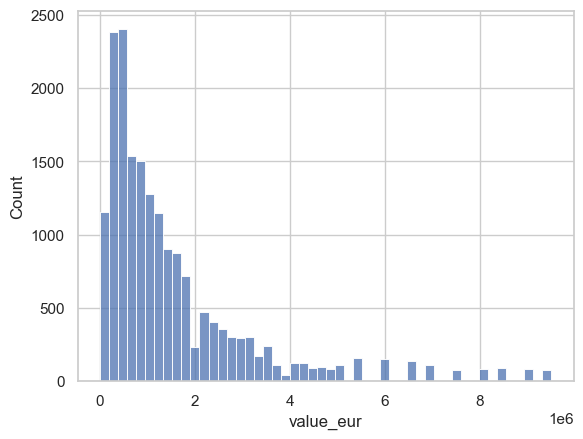

In [46]:
sns.histplot(df.value_eur[df.value_eur < 10000000], bins=50);

In [47]:
value_eur_logs = np.log1p(df.value_eur)

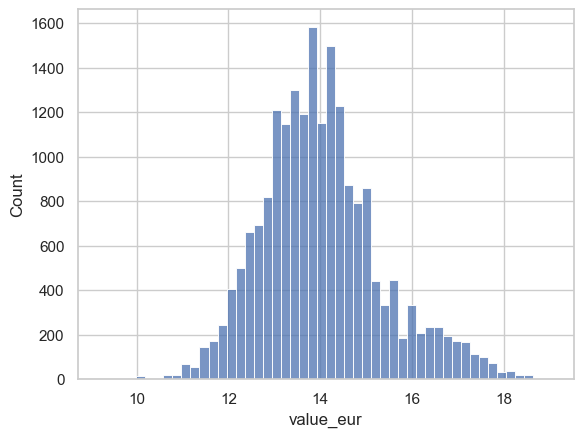

In [48]:
sns.histplot(value_eur_logs, bins=50);

In [49]:
df['value_eur_logs'] = value_eur_logs

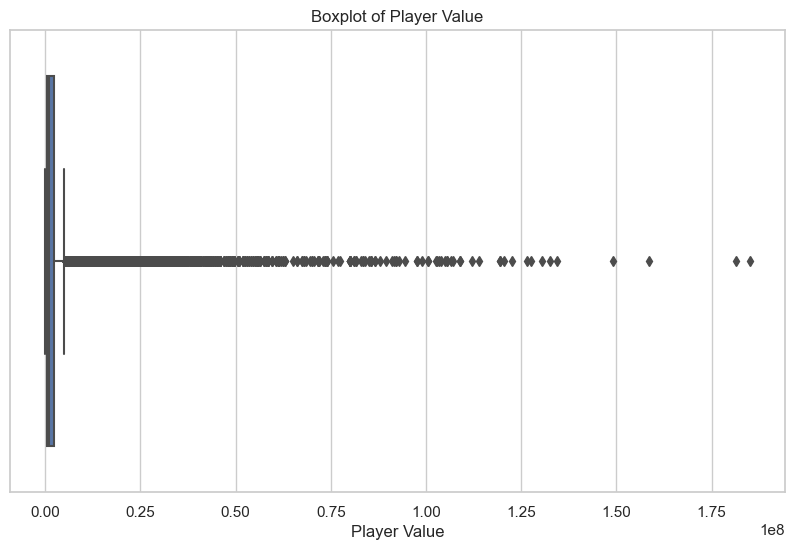

In [50]:
# Boxplot of player value
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['value_eur'], data=df)
plt.title('Boxplot of Player Value')
plt.xlabel('Player Value')
plt.show()

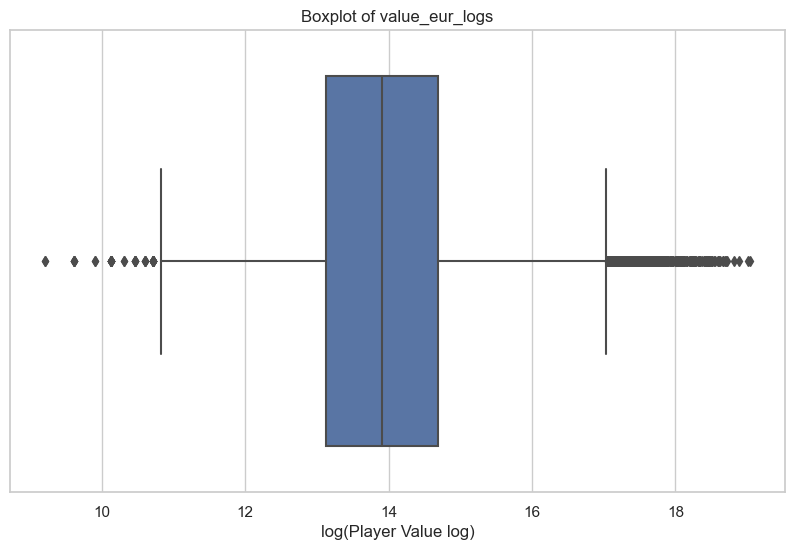

In [51]:
# Boxplot of value_logs
plt.figure(figsize=(10, 6))
sns.boxplot(x=value_eur_logs, data=df)
plt.title('Boxplot of value_eur_logs')
plt.xlabel('log(Player Value log)')
plt.show()

In [52]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

len(df_train), len(df_val), len(df_test)

(11985, 3995, 3996)

In [53]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [54]:
y_train = df_train.value_eur_logs.values
y_val = df_val.value_eur_logs.values
y_test = df_test.value_eur_logs.values
y_full_train = df_full_train.value_eur_logs.values

In [55]:
del df_train['value_eur']
del df_val['value_eur']
del df_test['value_eur']
del df_full_train['value_eur']

In [56]:
del df_train['value_eur_logs']
del df_val['value_eur_logs']
del df_test['value_eur_logs']
del df_full_train['value_eur_logs']

In [57]:
df_train.head()

,overall,potential,wage_eur,height_cm,weight_kg,league_level,club_jersey_number,club_contract_valid_until_year,weak_foot,skill_moves,...,body_type_Lean (170-),body_type_Lean (170-185),body_type_Lean (185+),body_type_Normal (170-),body_type_Normal (170-185),body_type_Normal (185+),body_type_Stocky (170-),body_type_Stocky (170-185),body_type_Stocky (185+),body_type_Unique
0,70,74,8000.0,195,85,1.0,1.0,2023.0,2,1,...,0,0,0,0,0,1,0,0,0,0
1,69,83,6000.0,188,80,1.0,16.0,2027.0,3,3,...,0,0,0,0,0,1,0,0,0,0
2,67,75,3000.0,179,79,1.0,32.0,2025.0,4,2,...,0,1,0,0,0,0,0,0,0,0
3,59,69,7000.0,186,77,1.0,53.0,2024.0,4,2,...,0,0,0,0,0,1,0,0,0,0
4,62,62,2000.0,174,71,1.0,15.0,2024.0,3,2,...,0,0,0,0,1,0,0,0,0,0


### Ridge Regression

In [58]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Define the alpha values for tuning the model
alpha_values = [0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]

# Initialize a dictionary to store the RMSE for each alpha value
rmse_scores = {}

X_train = df_train.values
X_val = df_val.values
X_test = df_test.values
X_full_train = df_full_train.values

# Initialize a scaler
scaler = MinMaxScaler()

# Fit the scaler to the training features and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test features using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

X_full_train_scaled = scaler.fit_transform(X_full_train)

In [59]:
from sklearn.model_selection import KFold

# Initialize the KFold object
kf = KFold(n_splits=5, random_state=42, shuffle=True)

# Iterate over each alpha value
for alpha in alpha_values:
    # Initialize the Ridge Regression model
    model = Ridge(alpha=alpha, random_state=42)

    rmse_list = []
    # Perform k-fold cross-validation
    for train_index, val_index in kf.split(X_full_train_scaled):
        X_train, X_val = X_full_train_scaled[train_index], X_full_train_scaled[val_index]
        y_train_new, y_val_new = y_full_train[train_index], y_full_train[val_index]

        # Fit the model to the scaled training data
        model.fit(X_train, y_train_new)

        # Make predictions on the scaled validation set
        y_val_pred = model.predict(X_val)
        
        # Undo the log transformation on the predictions
        y_val_pred_exp = np.expm1(y_val_pred)

        # Undo the log transformation on the actual target values
        y_val_exp = np.expm1(y_val_new)

        # Calculate the RMSE of the predictions
        rmse = np.sqrt(mean_squared_error(y_val_exp, y_val_pred_exp))

        rmse_list.append(rmse)

    # Store the average RMSE score corresponding to the current alpha value
    rmse_scores[alpha] = np.mean(rmse_list)

# Print the RMSE scores
for alpha, rmse in rmse_scores.items():
    print(f'Alpha: {alpha}, RMSE: {rmse}')

Alpha: 0, RMSE: 12461479.917365924
Alpha: 1e-05, RMSE: 12406376.710915249
Alpha: 0.0001, RMSE: 12406422.478218969
Alpha: 0.001, RMSE: 12406878.668996539
Alpha: 0.1, RMSE: 12446326.353167595
Alpha: 1, RMSE: 12570000.055844814
Alpha: 10, RMSE: 10392054.988153463


In [60]:
# Initialize the Ridge Regression model with the best alpha value
best_alpha = min(rmse_scores, key=rmse_scores.get)
best_model = Ridge(alpha=best_alpha, random_state=42)

# Fit the model to the scaled training data
best_model.fit(X_full_train_scaled, y_full_train)

# Make predictions on the scaled test set
y_test_pred = best_model.predict(X_test_scaled)

# Undo the log transformation on the predictions
y_test_pred_exp = np.expm1(y_test_pred)

# Undo the log transformation on the actual target values
y_test_exp = np.expm1(y_test)

# Calculate the RMSE of the predictions
rmse_test = np.sqrt(mean_squared_error(y_test_exp, y_test_pred_exp))

# Print the RMSE
print(f'Test RMSE: {rmse_test.round(2)}')

Test RMSE: 5645711.38


In [61]:
rmse_test/abs(y_test_exp.mean())

1.5441906602948847

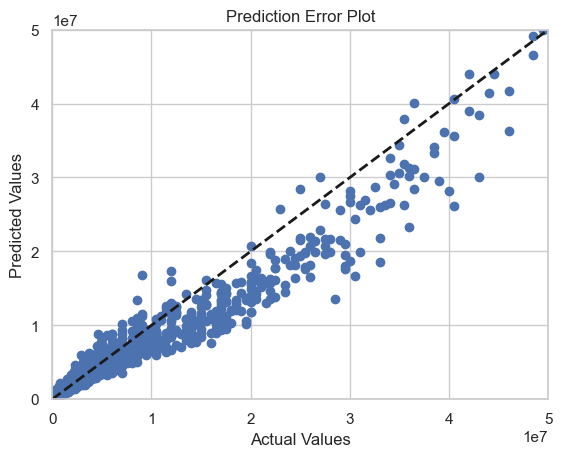

In [62]:
# Prediction error plot 
plt.scatter(y_test_exp, y_test_pred_exp)
plt.plot([y_test_exp.min(), y_test_exp.max()], [y_test_exp.min(), y_test_exp.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction Error Plot')
plt.xlim(0,50000000)
plt.ylim(0,50000000)
plt.show()

In [63]:
# Calculate the metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

mse = mean_squared_error(y_test_exp, y_test_pred_exp)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test_exp, y_test_pred_exp)
r2 = r2_score(y_test_exp, y_test_pred_exp)

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({
    'Model': ['Ridge Regression'],  # replace 'Model_Name' with the name of your model
    'Mean Squared Error (MSE)': [mse],
    'Root Mean Squared Error (RMSE)': [rmse],
    'Mean Absolute Error (MAE)': [mae],
    'R-squared (R2)': [r2]
})

In [64]:
metrics_df

,Model,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Error (MAE),R-squared (R2)
0,Ridge Regression,3.187406e+13,5.645711e+06,936784.652711,0.62351


### Random Forest Regression

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200]
}
# Initialize a Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Initialize the KFold object
kf = KFold(n_splits=5, random_state=42, shuffle=True)

# Initialize the Grid Search CV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=kf, n_jobs=-1, verbose=2)

# Fit the Grid Search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print(best_params)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
{'n_estimators': 200}


In [66]:
# Train a new Random Forest with the best parameters
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train_scaled, y_train)

# Make predictions on the scaled validation set
y_val_pred = best_rf.predict(X_val_scaled)

# Undo the log transformation on the predictions
y_val_pred_exp = np.expm1(y_val_pred)

# Undo the log transformation on the actual target values
y_val_exp = np.expm1(y_val)

# Calculate the RMSE of the predictions
rmse_val = np.sqrt(mean_squared_error(y_val_exp, y_val_pred_exp))

# Print the RMSE
print(f'Validation RMSE: {rmse_val.round(2)}')

Validation RMSE: 895440.11


In [67]:
# Make predictions on the scaled test set
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_full_train_scaled, y_full_train)
y_test_pred = best_rf.predict(X_test_scaled)

# Undo the log transformation on the predictions
y_test_pred_exp = np.expm1(y_test_pred)

# Undo the log transformation on the actual target values
y_test_exp = np.expm1(y_test)

# Calculate the RMSE of the predictions
rmse_test = np.sqrt(mean_squared_error(y_test_exp, y_test_pred_exp))

# Print the RMSE
print(f'Test RMSE: {rmse_test.round(2)}')

Test RMSE: 767805.35


In [68]:
rmse_test/abs(y_test_exp.mean())

0.21000681124656548

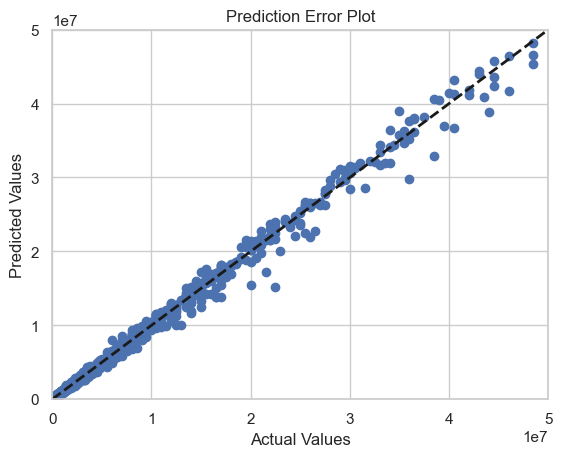

In [69]:
# Prediction error plot 
plt.scatter(y_test_exp, y_test_pred_exp)
plt.plot([y_test_exp.min(), y_test_exp.max()], [y_test_exp.min(), y_test_exp.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction Error Plot')
plt.xlim(0,50000000)
plt.ylim(0,50000000)
plt.show()

In [70]:
mse2 = mean_squared_error(y_test_exp, y_test_pred_exp)
rmse2 = sqrt(mse2)
mae2 = mean_absolute_error(y_test_exp, y_test_pred_exp)
r22 = r2_score(y_test_exp, y_test_pred_exp)

# Create a DataFrame to store the metrics for the second model
metrics_df2 = pd.DataFrame({
    'Model': ['Random Forest'],  # replace 'Model_Name2' with the name of your second model
    'Mean Squared Error (MSE)': [mse2],
    'Root Mean Squared Error (RMSE)': [rmse2],
    'Mean Absolute Error (MAE)': [mae2],
    'R-squared (R2)': [r22]
})

# Append the second DataFrame to the first DataFrame
metrics_df = pd.concat([metrics_df, metrics_df2], ignore_index=True)

In [71]:
metrics_df

,Model,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Error (MAE),R-squared (R2)
0,Ridge Regression,3.187406e+13,5.645711e+06,936784.652711,0.623510
1,Random Forest,5.895250e+11,7.678053e+05,177944.698680,0.993037


### XG Boost Regression

In [72]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200]
}

# Initialize an XGBoost Regressor
xgb = XGBRegressor(random_state=42)

# Initialize the KFold object
kf = KFold(n_splits=5, random_state=42, shuffle=True)

# Initialize the Grid Search CV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=kf, n_jobs=-1, verbose=2)

# Fit the Grid Search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [73]:
print(best_params)

{'n_estimators': 200}


In [74]:
# Train a new XGBoost with the best parameters
best_xgb = XGBRegressor(**best_params, random_state=42)
best_xgb.fit(X_train_scaled, y_train)

# Make predictions on the scaled validation set
y_val_pred = best_xgb.predict(X_val_scaled)

# Undo the log transformation on the predictions
y_val_pred_exp = np.expm1(y_val_pred)

# Undo the log transformation on the actual target values
y_val_exp = np.expm1(y_val)

# Calculate the RMSE of the predictions
rmse_val = np.sqrt(mean_squared_error(y_val_exp, y_val_pred_exp))

# Print the RMSE
print(f'Validation RMSE: {rmse_val}')

Validation RMSE: 962832.8897913332


In [75]:
# Make predictions on the scaled test set
best_xgb = XGBRegressor(**best_params, random_state=42)
best_xgb.fit(X_full_train_scaled, y_full_train)
y_test_pred = best_xgb.predict(X_test_scaled)

# Undo the log transformation on the predictions
y_test_pred_exp = np.expm1(y_test_pred)

# Undo the log transformation on the actual target values
y_test_exp = np.expm1(y_test)

# Calculate the RMSE of the predictions
rmse_test = np.sqrt(mean_squared_error(y_test_exp, y_test_pred_exp))

# Print the RMSE
print(f'Test RMSE: {rmse_test}')

Test RMSE: 764024.9984570657


In [76]:
rmse_test/abs(y_test_exp.mean())

0.2089728269985475

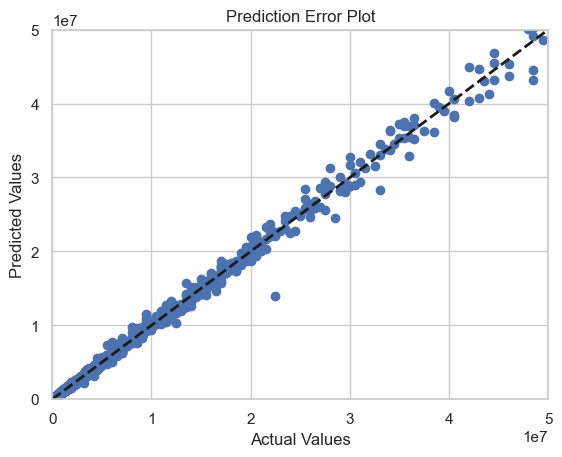

In [77]:
# Prediction error plot 
plt.scatter(y_test_exp, y_test_pred_exp)
plt.plot([y_test_exp.min(), y_test_exp.max()], [y_test_exp.min(), y_test_exp.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction Error Plot')
plt.xlim(0,50000000)
plt.ylim(0,50000000)
plt.show()

In [78]:
mse3 = mean_squared_error(y_test_exp, y_test_pred_exp)
rmse3 = sqrt(mse3)
mae3 = mean_absolute_error(y_test_exp, y_test_pred_exp)
r23 = r2_score(y_test_exp, y_test_pred_exp)

# Create a DataFrame to store the metrics for the second model
metrics_df3 = pd.DataFrame({
    'Model': ['XGBoost'],  # replace 'Model_Name2' with the name of your second model
    'Mean Squared Error (MSE)': [mse3],
    'Root Mean Squared Error (RMSE)': [rmse3],
    'Mean Absolute Error (MAE)': [mae3],
    'R-squared (R2)': [r23]
})

# Append the second DataFrame to the first DataFrame
metrics_df = pd.concat([metrics_df, metrics_df3], ignore_index=True)

In [79]:
metrics_df

,Model,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Error (MAE),R-squared (R2)
0,Ridge Regression,3.187406e+13,5.645711e+06,936784.652711,0.623510
1,Random Forest,5.895250e+11,7.678053e+05,177944.698680,0.993037
2,XGBoost,5.837342e+11,7.640250e+05,165264.674877,0.993105


The xgboost regressor gives the best results. Hence, it is chosen as the final model.

In [80]:
# Get feature importances
importances = best_xgb.feature_importances_

# Convert feature importances into a DataFrame
importance_df = pd.DataFrame({'feature': list(df_train.columns), 'importance': importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values('importance', ascending=False)

importance_df.head(30)

,feature,importance
12,release_clause_eur,0.822374
0,overall,0.036088
1,potential,0.018984
65,lm,0.010639
147,league_name_Super Lig,0.005445
58,lf,0.004895
105,league_name_Allsvenskan,0.004758
118,league_name_K League 1,0.004560
57,lw,0.004558
2,wage_eur,0.004312


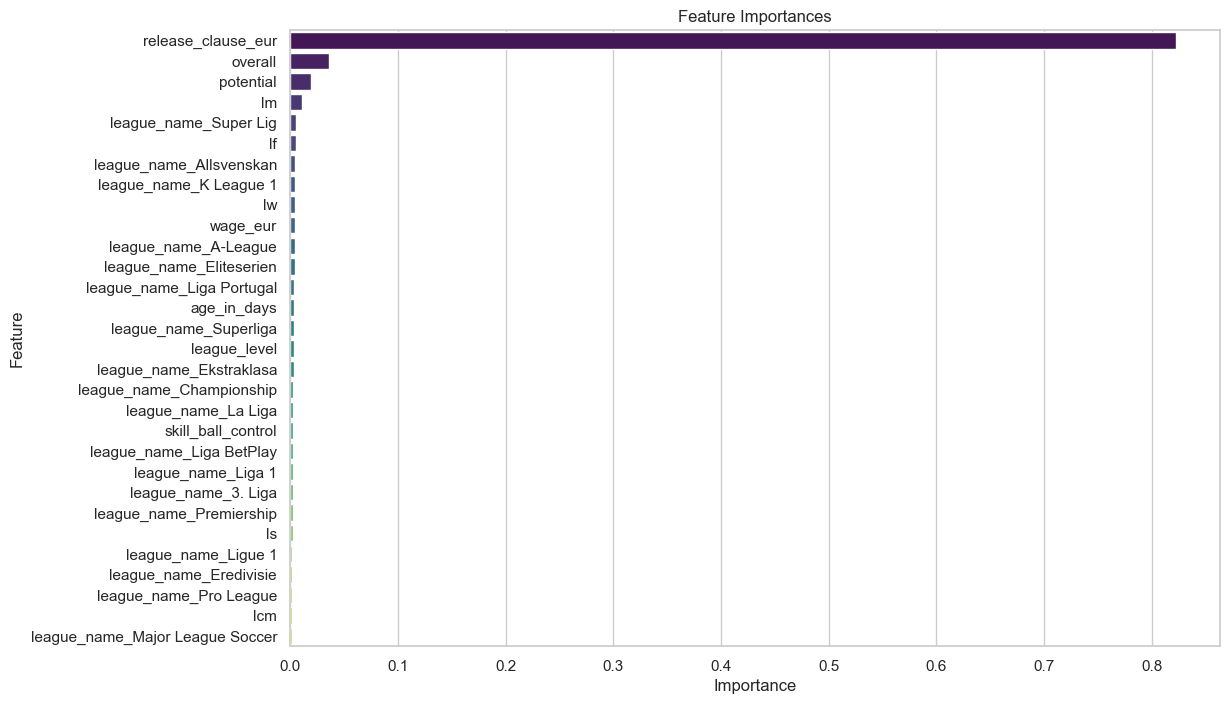

In [81]:
# Create a bar plot of feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=importance_df.head(30), palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

release_clause_eur is the most important feature.